In [1]:
import os
import torch
import gc
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from transformers import pipeline, BertTokenizer, TFBertForSequenceClassification, DetrImageProcessor, DetrForObjectDetection
from PIL import Image
from diffusers import StableDiffusionPipeline
from huggingface_hub import login

2025-02-18 16:57:54.663010: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 16:57:54.663507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 16:57:54.665767: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 16:57:54.671567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739894274.681209   43426 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739894274.68

In [2]:
tf.config.set_visible_devices([], 'GPU')

os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Crecimiento de memoria configurado para las GPUs.")
    except RuntimeError as e:
        print(f"Error al configurar crecimiento de memoria: {e}")

W0000 00:00:1739894279.639051   43426 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# EJERCICIOS

## EJERCICIO 1
Utiliza un modelo preentrenado de Hugging Face que clasifique textos en neutral y subjetivo y clasifica las siguientes opiniones:

* "I think the new city park is a great addition to the neighborhood. It offers a lot of green space and is a great place for families to spend time outdoors."

* "The customer service at the restaurant was disappointing. We had to wait over an hour just to get our drinks, and the staff seemed uninterested in helping us."

* "This book is just okay. It's not the best I've read, but it's not the worst either. The plot is somewhat predictable, but the characters are somewhat interesting."

* "The local library has extended its operating hours on weekends. It is now open from 9 a.m. to 7 p.m. on Saturdays and Sundays"

El resultado lo tiene que mostrar  de la siguiente forma:

* Texto: XXX 
* Clasificación: Y con una confianza del X%

In [36]:
from transformers import pipeline

classify = pipeline(
    task="text-classification",
    model="cffl/bert-base-styleclassification-subjective-neutral",
)

/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
input_text = [
    "I think the new city park is a great addition to the neighborhood. It offers a lot of green space and is a great place for families to spend time outdoors.",
    "The customer service at the restaurant was disappointing. We had to wait over an hour just to get our drinks, and the staff seemed uninterested in helping us.",
    "This book is just okay. It's not the best I've read, but it's not the worst either. The plot is somewhat predictable, but the characters are somewhat interesting.",
    "The local library has extended its operating hours on weekends. It is now open from 9 a.m. to 7 p.m. on Saturdays and Sundays",
]

# Iterate over each text and classify it
for text in input_text:
    resultado = classify(text)[0]
    
    print(f"Texto: {text}")
    print(f"Clasificacion: {resultado['label']}  -  Confianza: {resultado['score']*100:.2f}%\n")

Texto: I think the new city park is a great addition to the neighborhood. It offers a lot of green space and is a great place for families to spend time outdoors.
Clasificacion: SUBJECTIVE  -  Confianza: 89.20%

Texto: The customer service at the restaurant was disappointing. We had to wait over an hour just to get our drinks, and the staff seemed uninterested in helping us.
Clasificacion: SUBJECTIVE  -  Confianza: 81.92%

Texto: This book is just okay. It's not the best I've read, but it's not the worst either. The plot is somewhat predictable, but the characters are somewhat interesting.
Clasificacion: SUBJECTIVE  -  Confianza: 87.63%

Texto: The local library has extended its operating hours on weekends. It is now open from 9 a.m. to 7 p.m. on Saturdays and Sundays
Clasificacion: NEUTRAL  -  Confianza: 97.11%



## EJERCICIO 2
Traduce el siguiente texto del inglés al español usando un modelo preentrenado de Hugging Face: "The achievements of artificial intelligence are impressive."

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("translation", model="robertrengel/autotrain-traductor-en-es-2023-3608896666")

/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-18 17:39:43.440377: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 17:39:43.440842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 17:39:43.443025: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 17:39:43.448710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to regis

In [6]:
text="The achievements of artificial intelligence are impressive."

print(pipe(text, max_length=40)[0]['translation_text'])

Los logros de la inteligencia artificial son impresionantes.


## EJERCICIO 3
Genera un texto continuando la siguiente frase: "Los logros de la inteligencia artificial..."

Usa gpt2

In [18]:
from transformers import pipeline

pipe = pipeline("text-generation", model="openai-community/gpt2")

/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
text="Los logros de la inteligencia artificial..."

for result in pipe(text, max_length=40,num_return_sequences=5):
    print(result['generated_text'])
    print("\n")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Los logros de la inteligencia artificial...

FEMENO-MIDIA de MOLY:


Estar una perdida la nueva del N


Los logros de la inteligencia artificial...

"For sure it's the best. But...we're gonna give you one more chance..."

What? That wasn't an effort


Los logros de la inteligencia artificial...

Treaty of the Grand Jury for Conspiracy in the Russian Coup de Duma

The President of Ecuador has urged the European Union to


Los logros de la inteligencia artificial...

S-F--C-F-Y-V--N-L--X--T

P-M--R-N


Los logros de la inteligencia artificial... I guess I do. There's a problem... I've gotta get back. I can't stand him anymore. Oh you know he's in there




## EJERCICIO 4
Entrena un modelo de análisis de sentimientos en un pequeño conjunto de datos personalizado usando un modelo de Hugging Face. Supongamos que tienes el siguiente conjunto de datos (evidentemente con este conjunto de datos tan pequeño no vamos a ningún lado, se trata de simular el proceso):

* "I enjoy playing football.", Positivo
* "The restaurant had poor service.", Negativo
* "Such a beautiful day outside!", Positivo

Si quieres puedes usar el modelo bert-base-uncased

Los pasos generales que puedes seguir son:
* Prepara los datos de entrenamiento (X e y).
* Carga un modelo preentrenado de Transformers y su tokenizador.
* Preprocesa los datos para que sean compatibles con el modelo.
* Compila el modelo con una función de pérdida y un optimizador.
* Entrena el modelo con los datos.
* Evalúa el modelo con algunos datos ("I enjoy playing basketboall.", Positivo y "I hate rainning days.", Negativo).
* Predice nuevos datos ("The restaurant had a good service.")

In [24]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

# Datos de entrenamiento
data = [
    ("I enjoy playing football.", 1),
    ("The restaurant had poor service.", 0),
    ("Such a beautiful day outside!", 1)
]

# Datos de evaluación
eval_data = [
    ("I enjoy playing basketball.", 1),
    ("I hate raining days.", 0)
]

# Tokenizador
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

# Definir dataset personalizado
class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text, label = self.data[idx]
        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=32, return_tensors="pt")
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Crear dataset
dataset = SentimentDataset(data, tokenizer)
eval_dataset = SentimentDataset(eval_data, tokenizer)

# Cargar modelo
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=2)

# Definir argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs"
)

# Entrenador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=eval_dataset
)

# Entrenar modelo
trainer.train()

# Función para predecir
def predict(text):
    encoding = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=32)
    with torch.no_grad():
        outputs = model(**encoding)
    logits = outputs.logits
    predicted_class = torch.argmax(logits).item()
    return "Positivo" if predicted_class == 1 else "Negativo"

# Predicción de nuevo texto
new_text = "The restaurant had a good service."
print("Predicción:", predict(new_text))


/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 20%|██        | 2/10 [00:00<00:03, 

{'eval_loss': 0.7199058532714844, 'eval_runtime': 0.049, 'eval_samples_per_second': 40.853, 'eval_steps_per_second': 20.426, 'epoch': 1.0}


 40%|████      | 4/10 [00:06<00:10,  1.81s/it]

{'eval_loss': 0.6955693364143372, 'eval_runtime': 0.0444, 'eval_samples_per_second': 45.083, 'eval_steps_per_second': 22.542, 'epoch': 2.0}


 60%|██████    | 6/10 [00:08<00:04,  1.22s/it]

{'eval_loss': 0.6583678126335144, 'eval_runtime': 0.0496, 'eval_samples_per_second': 40.285, 'eval_steps_per_second': 20.143, 'epoch': 3.0}


 80%|████████  | 8/10 [00:10<00:01,  1.00it/s]

{'eval_loss': 0.6427873373031616, 'eval_runtime': 0.0427, 'eval_samples_per_second': 46.832, 'eval_steps_per_second': 23.416, 'epoch': 4.0}


100%|██████████| 10/10 [00:13<00:00,  1.13it/s]

{'eval_loss': 0.6465479135513306, 'eval_runtime': 0.0472, 'eval_samples_per_second': 42.375, 'eval_steps_per_second': 21.188, 'epoch': 5.0}


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]

{'train_runtime': 14.0713, 'train_samples_per_second': 1.066, 'train_steps_per_second': 0.711, 'train_loss': 0.5450847148895264, 'epoch': 5.0}
Predicción: Negativo


## EJERCICIO 5
Utiliza un modelo preentrenado de Hugging Face para generar una descripción (caption) para una imagen dada.

In [28]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Cargar el modelo y el procesador de BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Cargar la imagen
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Procesar la imagen y generar el texto descriptivo
inputs = processor(image, return_tensors="pt")
out = model.generate(**inputs)

# Decodificar el texto generado
caption = processor.decode(out[0], skip_special_tokens=True)
print(caption)

two cats sleeping on a couch


## EJERCICIO 6
Elige un modelo de detcción de objetos de Hugging Face y aplícalo a una imagen.

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


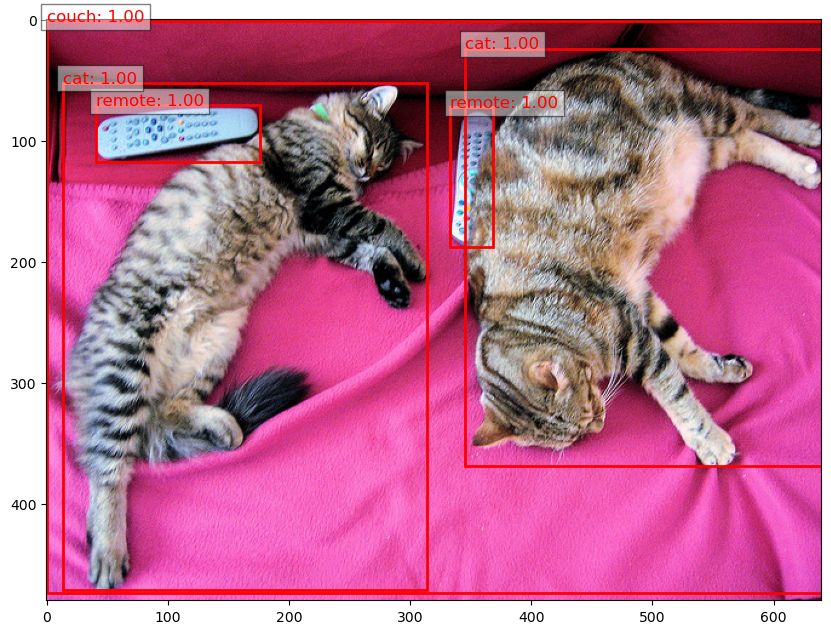

In [7]:
import torch
import requests
from PIL import Image
from transformers import DetrImageProcessor, DetrForObjectDetection

# Cargar imagen desde una URL
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Cargar el modelo y procesador de Hugging Face
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Preprocesar imagen
inputs = processor(images=image, return_tensors="pt")

# Realizar predicción
with torch.no_grad():
    outputs = model(**inputs)

# Obtener resultados
target_sizes = torch.tensor([image.size[::-1]])  # Invertimos tamaño de la imagen para adaptar a formato esperado
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Dibujar detecciones en la imagen
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x, y, f"{model.config.id2label[label.item()]}: {score:.2f}", color="red", fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

plt.show()


## EJERCICIO 7
Genera un texto usando un modelo de generción de texto (gpt2).
Usa el texto creado como entrada para un modelo de generación de imágenes (stable-diffusion).

El texto de entrada para el primer modelo va a ser

/home/iabd/anaconda3/envs/IABD2/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Texto generado: Un babuino surfeando en una jungla del pristo, para la ficación como más puede con uno que nombre se puede escondida de cientías que o los dizero la fado." Un en que se ha pueden están para con la compañero del trabajadores. "Estoy de año de nuestro para más para lo puede


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (88 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['año de nuestro para más para lo puede']
100%|██████████| 50/50 [03:45<00:00,  4.51s/it]


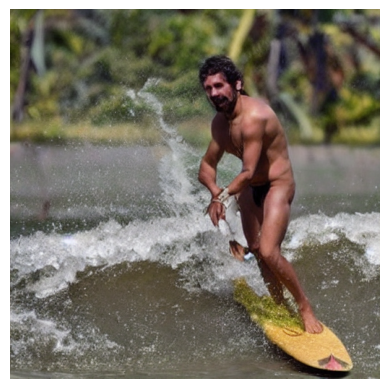

In [10]:
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# 1. Generación de texto con GPT-2
generator = pipeline("text-generation", model="gpt2")
prompt = "Un babuino surfeando en una jungla"
generated_text = generator(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']
print("Texto generado:", generated_text)

# 2. Generación de imagen con Stable Diffusion
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Generar imagen a partir del texto generado
image = pipe(generated_text).images[0]

# Guardar la imagen
image.save("babuino_surfeando.png")

# Mostrar la imagen con matplotlib
plt.imshow(image)
plt.axis("off")
plt.show()


## EJERCICIO 8 (OPCIONAL)
Encadena con sentido tres modelos de Hugging Face para realizar una tarea de NLP, una de visión y una de generación de imágenes.